In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [5]:
import cv2
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [33]:
from sklearn.metrics import confusion_matrix , classification_report

In [6]:
import os

### loading data

In [7]:
Dataset= pd.read_csv('D:\Character dataset\english.csv')
Datadir= 'D:\Character dataset'

<class 'str'>
img_array- 0 = img001-001.png


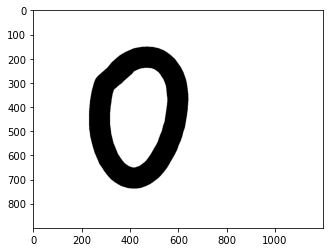

In [8]:

path= os.path.join(Datadir,'Img')
for i,img in enumerate(os.listdir(path)):
    print(type(img))
    img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    print('img_array-',i,'=',img)
    plt.imshow(img_array, cmap='gray')
    break 

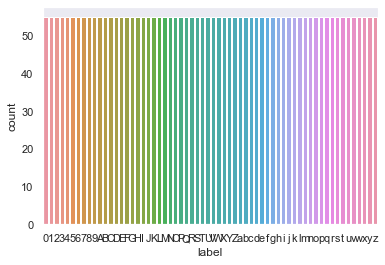

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="label", data=Dataset)

In [10]:
word_dict = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':10,"B":11,'C':12,'D':13,'E':14,'F':15 ,'G':16 ,'H':17,
            'I':18,'J':19, 'K':20, 'L':21, 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30 , 'V':31 ,'W': 32, 'X':33 , 
            'Y': 34, 'Z': 35, 'a':36 , 'b':37 , 'c':38 , 'd':39 ,'e':40 ,'f':41 ,'g':42 , 'h':43 , 'i':44 , 'j':45 , 'k':46 , 'l':47 , 'm':48 , 'n':49 , 'o':50 ,
            'p':51 , 'q':52 , 'r':53 , 's':54 , 't':55 , 'u':56 , 'v':57 , 'w':58 , 'x':59 , 'y':60 , 'z':61  }

In [11]:
for index,value in enumerate(Dataset['label']):
    Dataset['label'][index]= word_dict[value]

In [12]:
Data= Dataset.sample(frac=1)

In [13]:
X_data=Data.drop('label', axis=1)
X_data.head(10)

,image
471,Img/img009-032.png
2064,Img/img038-030.png
2257,Img/img042-003.png
2638,Img/img048-054.png
120,Img/img003-011.png
989,Img/img018-055.png
1606,Img/img030-012.png
1287,Img/img024-023.png
2234,Img/img041-035.png
2841,Img/img052-037.png


In [14]:
y=Data['label']
y.head(10)

471      8
2064    37
2257    41
2638    47
120      2
989     17
1606    29
1287    23
2234    40
2841    51
Name: label, dtype: object

In [15]:
X=[]
for img in X_data.image:
    img_array= cv2.imread(os.path.join(Datadir,img), cv2.IMREAD_GRAYSCALE)
    new_array= cv2.resize(img_array, (28,28)) 
    X.append(new_array)
    

In [16]:
X= np.array(X)

In [17]:
X.shape

(3410, 28, 28)

In [18]:
y=y.values

In [19]:
y.shape

(3410,)

### Using another dataset

In [20]:
Datadir2= 'D:\dataset_english\English\Img'


In [21]:
training_data=[]
for index, way in enumerate(os.listdir(Datadir2)):
    print(index, 'way:', way)
    img_goodbad= os.path.join(Datadir2,way)
    img_goodbad_list=os.listdir(img_goodbad)
    for index2, way2 in enumerate(os.listdir(os.path.join(img_goodbad,img_goodbad_list[0]))):
        
        for imag in os.listdir(os.path.join( os.path.join(img_goodbad,img_goodbad_list[0]),way2)):
            dirr= os.path.join( os.path.join(img_goodbad,img_goodbad_list[0]),way2)
            try:
                img_array= cv2.imread(os.path.join(dirr,imag), cv2.IMREAD_GRAYSCALE)
                img_size= 28
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, index2])
            except Exception:
                pass
            
        
        
            

0 way: BadImag
1 way: GoodImg


In [22]:
import random

random.shuffle(training_data)

In [23]:

second_X= []
second_y= []
for features, label in training_data:
    second_X.append(features)
    second_y.append(label)
second_X= np.array(second_X)
second_y= np.array(second_y)


second_y:--- 24


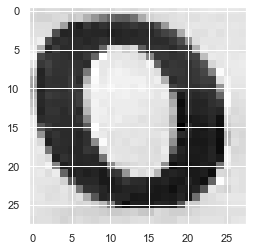

In [24]:
plt.imshow(second_X[25], cmap='gray')
print('second_y:---', second_y[25])

### Combining two datasets

In [25]:
new_X = np.vstack((X, second_X))  ## stacking along columns
new_y= np.hstack((y,second_y))    ## stacking along rows

new_y:--- 0


(15913,)

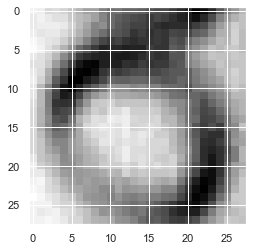

In [26]:
plt.imshow(new_X[4000], cmap='gray')
print('new_y:---', new_y[4000])
new_y.shape

In [27]:
new_X.shape

(15913, 28, 28)

In [28]:
new_y= np.asarray(new_y).astype(np.int32)


In [29]:
new_train_X= new_X[:15000]
new_train_y= new_y[:15000]
new_test_X= new_X[15000:]
new_test_y=new_y[15000:]

In [30]:
new_train_X= new_train_X.reshape(-1, 28,28, 1)
new_test_X= new_test_X.reshape(-1, 28,28, 1)

In [28]:
#train_x, test_x, train_y, test_y = train_test_split(new_X, new_y, test_size = 0.2)

In [29]:
#train_x.shape

In [30]:
#train_x= train_x.reshape(-1, 28,28, 1)
#test_x= test_x.reshape(-1, 28,28, 1)


In [31]:
#train_x= np.asarray(train_x).astype(np.float32)
#test_x = np.asarray(test_x).astype(np.float32)


In [32]:
#train_y= np.asarray(train_y).astype(np.int32)

In [33]:
#test_y=np.asarray(test_y).astype(np.int32)

In [31]:
new_train_X=new_train_X/255
new_test_X=new_test_X/255
new_train_X.shape

(15000, 28, 28, 1)

In [32]:
train_yOHE = to_categorical(new_train_y, num_classes = 62, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(new_test_y, num_classes = 62, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (15000, 62)
New shape of test labels:  (913, 62)


#### creating  model

In [77]:
import datetime

logfit = "logsmallDropout/smallscalarDropout/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logfit)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=new_train_X.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))

model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))

model.add(Dense(62,activation ="softmax"))

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(new_train_X, train_yOHE , epochs=10,  validation_split=0.2, callbacks=[tensorboard_callback] )

model.save('HandwrittenRecognitionDoubleDropout.model')


Epoch 1/10
375/375 [==============================] - 14s 36ms/step - loss: 3.9496 - accuracy: 0.0556 - val_loss: 2.9070 - val_accuracy: 0.2617
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 2.6472 - accuracy: 0.3109 - val_loss: 1.7503 - val_accuracy: 0.5347
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 1.7387 - accuracy: 0.5093 - val_loss: 1.3952 - val_accuracy: 0.6183
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 1.3886 - accuracy: 0.6042 - val_loss: 1.2690 - val_accuracy: 0.6497
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 1.1587 - accuracy: 0.6606 - val_loss: 1.1539 - val_accuracy: 0.6857
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 1.0247 - accuracy: 0.6894 - val_loss: 1.0665 - val_accuracy: 0.7080
Epoch 7/10
375/375 [==============================] - 12s 32ms/step - loss: 0.9168 - accuracy: 0.7216 - val_loss: 1.0495 - val_accuracy:

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)              

In [36]:
predictions= model.predict([new_test_X])

In [80]:
model.evaluate(new_test_X,test_yOHE)

29/29 [==============================] - 0s 9ms/step - loss: 1.0778 - accuracy: 0.7207


[1.0778369903564453, 0.7207009792327881]

In [82]:
dict_keys=list(word_dict.keys())
dict_values= list(word_dict.values())

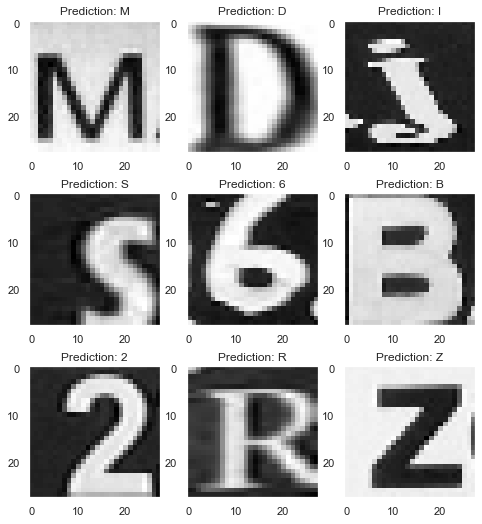

In [83]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = new_test_X[i]
    ax.imshow(img, cmap="gray")
   
    max_value= np.argmax(predictions[i])
    dict_values.index(max_value)
    pred= dict_keys[dict_values.index(dict_values.index(max_value))]
    
    ax.set_title("Prediction: "+ pred)
    ax.grid()

In [ ]:
# dirr='D:\dataset_english\English\Img\GoodImg\Bmp\Sample001'
# img_ar= cv2.imread(os.path.join(dirr,'img001-00023.png'), cv2.IMREAD_GRAYSCALE)


In [34]:
model= tf.keras.models.load_model("HandwrittenRecognitionDropout.model")

In [ ]:
import os 

In [37]:
predicted=  [(np.argmax(i)) for i in predictions]


In [88]:
cm=tf.math.confusion_matrix(labels=new_test_y, predictions= predicted) ## CM is used to describe the performance of the model
cm

<tf.Tensor: shape=(62, 62), dtype=int32, numpy=
array([[3, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 9, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])>

In [41]:
print(classification_report(new_test_y, predicted))


              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.75      0.30      0.43        10
           2       0.71      1.00      0.83        12
           3       1.00      1.00      1.00         5
           4       1.00      0.67      0.80         3
           5       0.70      0.78      0.74         9
           6       0.50      0.67      0.57         3
           7       1.00      0.60      0.75         5
           8       1.00      1.00      1.00         2
           9       0.67      0.50      0.57         4
          10       0.92      0.92      0.92        74
          11       0.88      0.78      0.82         9
          12       0.72      0.78      0.75        23
          13       0.65      0.91      0.75        22
          14       0.95      0.91      0.93        58
          15       0.80      0.73      0.76        11
          16       0.82      0.88      0.85        16
          17       0.80    

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(426.5, 0.5, 'Truth')

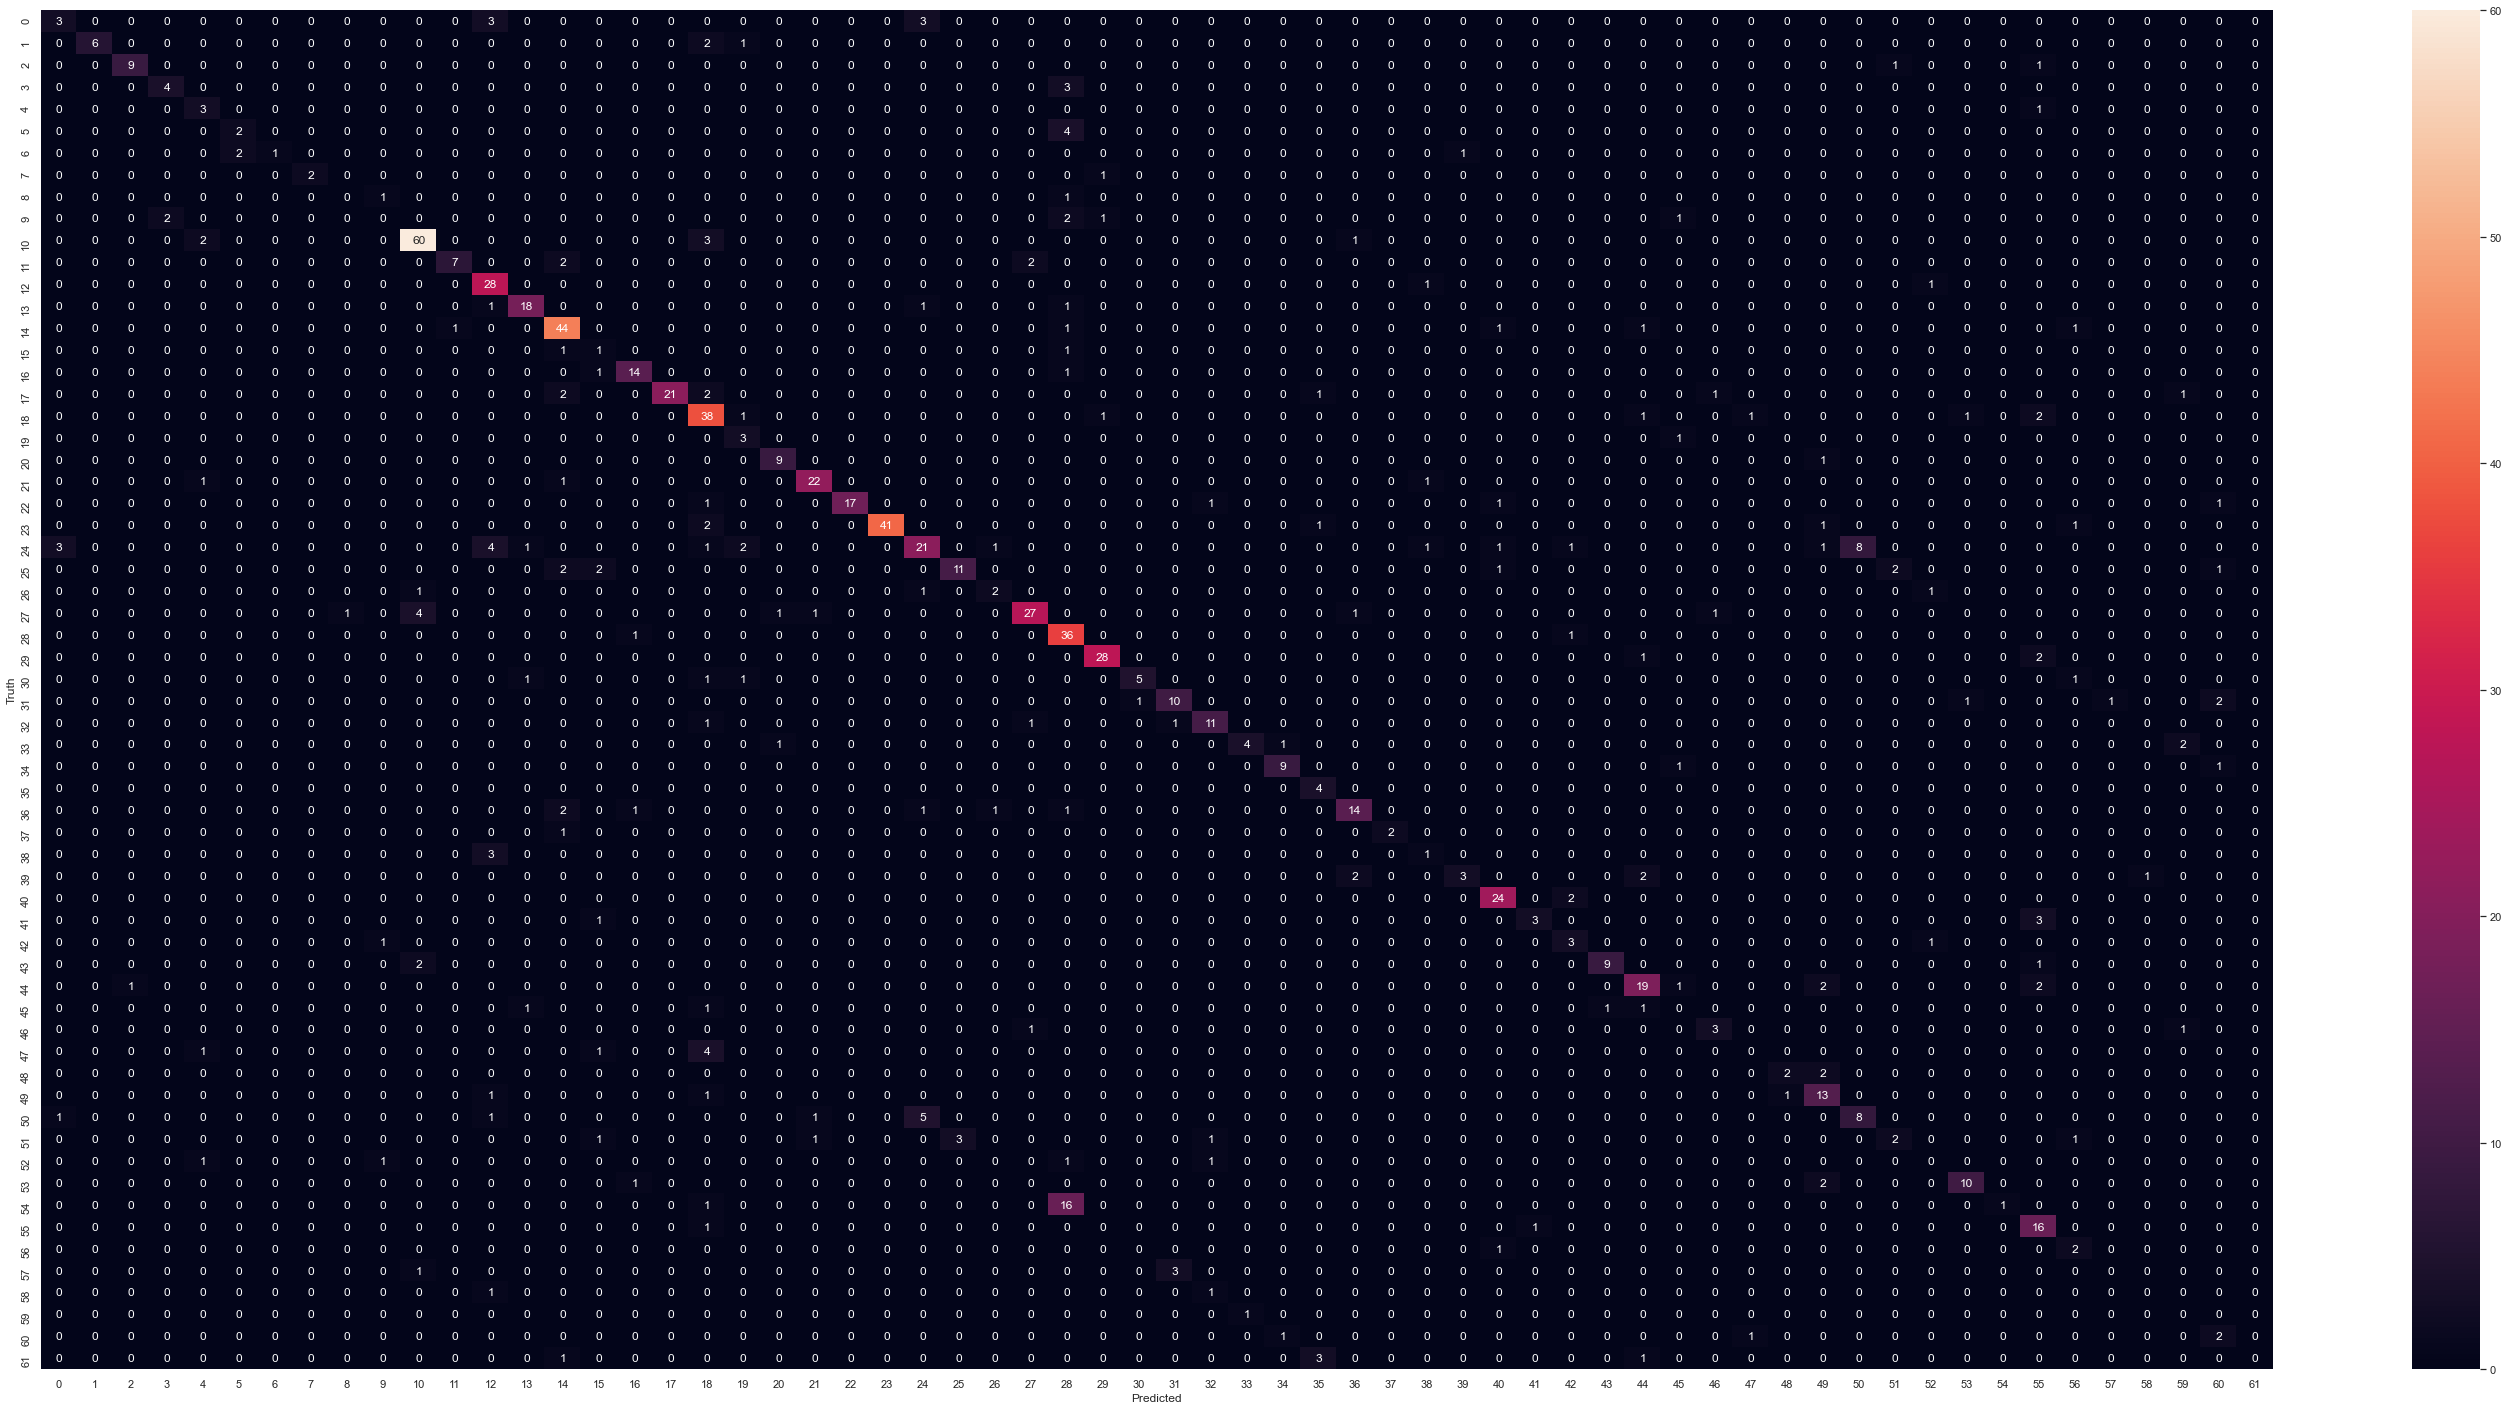

In [96]:
import seaborn as sn
plt.figure(figsize = (50,25))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
Directory = "D:\external_dataset"
directory_img= os.listdir(Directory)

directory_img
#new_image_array= cv2.resize(image_array, (28,28))

['A.jpg',
 'B.jpg',
 'five.jpg',
 'H.jpg',
 'J.jpg',
 'M.jpg',
 'O.jpg',
 'two.jpg',
 'w.jpg']

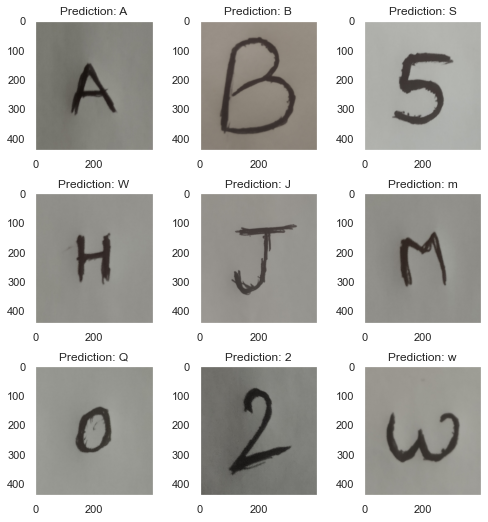

In [85]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):

    image_array = cv2.imread(os.path.join(Directory, directory_img[i]))
    #img_copy = image_array.copy()

    img = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400,440))
    
    ax.imshow(img, cmap="gray")
                             
    img_copy = cv2.GaussianBlur(image_array, (7,7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

    img_final = cv2.resize(img_thresh, (28,28))
    img_final =np.reshape(img_final, (1,28,28,1))
    
    max_value= np.argmax(model.predict([img_final]))
    dict_values.index(max_value)
    pred= dict_keys[dict_values.index(dict_values.index(max_value))]
    plt.subplots_adjust( hspace=0.2, wspace=0.4)
    ax.set_title("Prediction: "+ pred)
    ax.grid()